<H1> Implement VaR using Monte Carlo Simulations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from scipy.stats import norm

In [2]:
years = 10 #Get 10 years of data

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365 * years)

In [3]:
tickers = ['SPY', 'XLK', 'QQQ', 'VTI', 'AAPL', 'MSFT']
dly_adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, startDate, endDate)
    dly_adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<H3> Calculate the daily log returns and drop any NAs

In [4]:
log_returns = np.log(dly_adj_close_df/dly_adj_close_df.shift(1))
log_returns = log_returns.dropna()

<h2> Create a function that will be used to calculate portfolio expected return

<H4> *** We are assuming that future returns are based on past returns, may be not a good assumption

In [5]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights)

<H2> Create a function that will calculate Portfolio Standard Deviation

In [6]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

<H1> Create a covariance matrix for all the securities

In [7]:
cov_matrix = log_returns.cov()
print(cov_matrix)

           SPY       XLK       QQQ       VTI      AAPL      MSFT
SPY   0.000122  0.000146  0.000139  0.000124  0.000146  0.000149
XLK   0.000146  0.000201  0.000187  0.000148  0.000213  0.000211
QQQ   0.000139  0.000187  0.000183  0.000141  0.000197  0.000197
VTI   0.000124  0.000148  0.000141  0.000127  0.000147  0.000149
AAPL  0.000146  0.000213  0.000197  0.000147  0.000323  0.000203
MSFT  0.000149  0.000211  0.000197  0.000149  0.000203  0.000291


<h3> Portfolio valuations

In [8]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)] * len(tickers))

portfolio_expected_return = expected_return(weights, log_returns)
portfolio_Std_devitation = standard_deviation(weights, cov_matrix)

<H3> Create function that creates random z score based on normal distribution

In [9]:
def random_z_score():
    return np.random.normal(0,1)

<H3> Create Gain Loss scenario

In [10]:
days = 5

def scenario_gain_loss(portfolio_value, porfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * porfolio_std_dev * z_score * np.sqrt(days)

In [11]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_Std_devitation, z_score, days))

<H2> Specify a confidence interval and compute VaR

In [12]:
confidence_interval = 0.95
VaR = -np.percentile(scenarioReturn, 100* (1 - confidence_interval))
print(VaR)

43495.36117202649


<H3> Plot the graph for Portfolio VaR

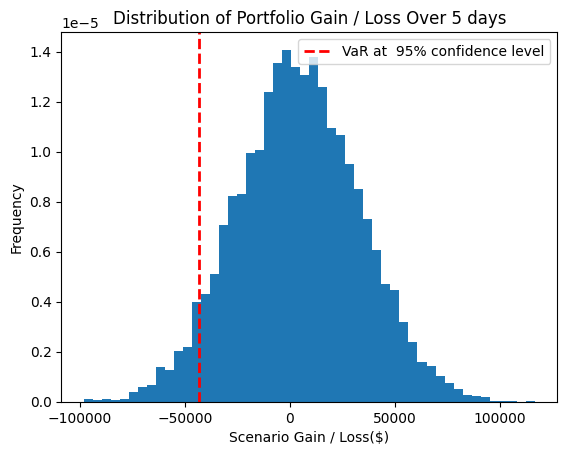

In [13]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel("Scenario Gain / Loss($)")
plt.ylabel("Frequency")
plt.title(f"Distribution of Portfolio Gain / Loss Over {days} days")
plt.axvline(-VaR, color='r', linestyle='dashed',linewidth=2, label=f'VaR at {confidence_interval: .0%} confidence level')
plt.legend()
plt.show()